In [171]:
import tensorflow as tf
import pandas as pd
import numpy as np
import random
import csv
import matplotlib.pyplot as plt

from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tqdm.notebook import tqdm

In [190]:
def to_bin(x, l=0):
    x = list(map(int, list(bin(x)[2:])))
    return [0]*(l-len(x))+x
    #return (10*[0] +x)[-l:]
    
def to_dec(x):
    x = list(map(str, x))
    return int(''.join(x), 2)
    

In [321]:
X = []
y = []
for j in tqdm(range(10000, 10255)):
    for k in range(10000, 10255):
        s = j+k
        jb = to_bin(j, 14)
        kb = to_bin(k, 14)
        sb = to_bin(s, 15)
        
        X.append(jb + kb)
        y.append(sb)

X = np.array(X)
y = np.array(y)

In [322]:
len(X)

65025

In [323]:


X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.9, shuffle=True)


In [324]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((58522, 28), (6503, 28), (58522, 15), (6503, 15))

In [325]:
X_train

array([[1, 0, 0, ..., 0, 0, 1],
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 1, 1, 0],
       ...,
       [1, 0, 0, ..., 1, 0, 0],
       [1, 0, 0, ..., 1, 0, 1],
       [1, 0, 0, ..., 1, 0, 1]])

In [326]:
model = keras.Sequential()
model.add(layers.Dense(32, activation='relu', input_shape=(X_train.shape[1],)))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(15, activation='sigmoid'))
model.summary()

Model: "sequential_42"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_108 (Dense)            (None, 32)                928       
_________________________________________________________________
dense_109 (Dense)            (None, 32)                1056      
_________________________________________________________________
dense_110 (Dense)            (None, 32)                1056      
_________________________________________________________________
dense_111 (Dense)            (None, 15)                495       
Total params: 3,535
Trainable params: 3,535
Non-trainable params: 0
_________________________________________________________________


In [327]:
#from tf.keras.optimizers import SGD 
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))

Train on 58522 samples, validate on 6503 samples
Epoch 1/100
58522/58522 [==============================] - 6s 109us/sample - loss: 0.3501 - accuracy: 0.7752 - val_loss: 0.2833 - val_accuracy: 0.8193
Epoch 2/100
58522/58522 [==============================] - 5s 91us/sample - loss: 0.2714 - accuracy: 0.8248 - val_loss: 0.2547 - val_accuracy: 0.8360
Epoch 3/100
58522/58522 [==============================] - 6s 94us/sample - loss: 0.2471 - accuracy: 0.8409 - val_loss: 0.2339 - val_accuracy: 0.8521
Epoch 4/100
58522/58522 [==============================] - 6s 106us/sample - loss: 0.2265 - accuracy: 0.8587 - val_loss: 0.2162 - val_accuracy: 0.8631
Epoch 5/100
58522/58522 [==============================] - 6s 108us/sample - loss: 0.2098 - accuracy: 0.8692 - val_loss: 0.2004 - val_accuracy: 0.8745
Epoch 6/100
58522/58522 [==============================] - 7s 116us/sample - loss: 0.1957 - accuracy: 0.8791 - val_loss: 0.1903 - val_accuracy: 0.8803
Epoch 7/100
58522/58522 [======================

In [317]:
y_pred = np.round(model.predict(X_test)).astype(int)
y_pred_dec = np.array([to_dec(x) for x in y_pred])
y_test_dec = np.array([to_dec(x) for x in y_test])
model.predict(X_test)

array([[1.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        1.95503235e-05, 0.00000000e+00, 1.00000000e+00],
       [1.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 3.84855270e-02, 0.00000000e+00],
       [1.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        1.40070915e-05, 1.00000000e+00, 1.00000000e+00],
       ...,
       [1.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        9.96389151e-01, 5.69224358e-06, 1.00000000e+00],
       [1.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        1.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        9.99972224e-01, 4.67207383e-06, 0.00000000e+00]], dtype=float32)

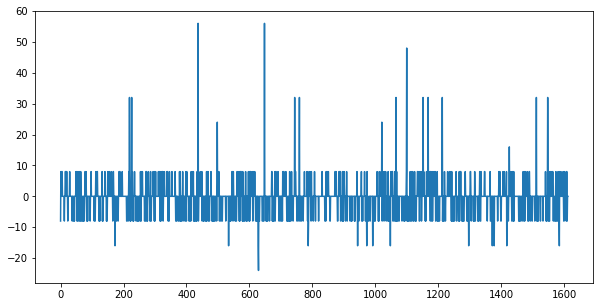

In [318]:

plt.figure(figsize=(10,5))
plt.plot((y_test_dec-y_pred_dec))

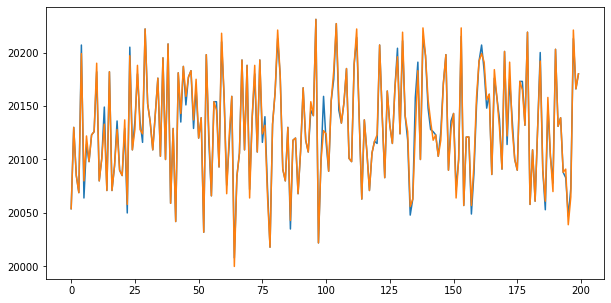

In [320]:
plt.figure(figsize=(10,5))
plt.plot((y_test_dec)[-200:])
plt.plot((y_pred_dec)[-200:])

In [59]:
data2 = tf.keras.datasets.cifar10.load_data()

In [72]:
X_train = data2[0][0]
X_test = data2[1][0]
y_train = data2[0][1]
y_test = data2[1][1]

In [82]:
model2 = keras.Sequential()
model2.add(layers.Flatten())
model2.add(layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)))
model2.add(layers.Dense(64, activation='relu'))
model2.add(layers.Dense(10, activation='softmax'))
model2.summary()

ValueError: This model has not yet been built. Build the model first by calling `build()` or calling `fit()` with some data, or specify an `input_shape` argument in the first layer(s) for automatic build.

In [75]:
model.compile(optimizer='sgd', loss='mean_squared_error')

history = model.fit(X_train, y_train, epochs=5, batch_size=128, validation_data=(X_test, y_test))

ValueError: Error when checking input: expected dense_21_input to have 2 dimensions, but got array with shape (50000, 32, 32, 3)